## <font color='DarkMagenta'>Цель исследования<font/>

Построить отчет, отвечающий на следующие вопросы:
- Какая возрастная группа лучше всего оформляет триальную подписку;
- Какая возрастная группа лучше всего конвертируется из триальной подписки в платную подписку. 

## <font color='DarkMagenta'>Описание данных<font/>

Данные о пользователях за все время, которые включают в себя следующую информацию:
- Id пользователя;
- Дату установки приложения;
- Страну пользователя;
- Данные о каждом действии пользователя;
- Время совершения вышеупомянутых действий.

### <font color='DarkMagenta'>  1. Получение первичной информации, очистка данных<font/>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/folde/Desktop/data.csv')

In [3]:
data.head(10)

,appsflyer_id,install_time,event_name,event_time,country_code
0,1646082115451-9329704,2022-03-01 00:02:44.000,af_onb_screen_1_1,2022-03-01 00:02:46.000,US
1,1646082115451-9329704,2022-03-01 00:02:44.000,af_onb_screen_1_2,2022-03-01 00:02:49.000,US
2,1646082115451-9329704,2022-03-01 00:02:44.000,af_onb_screen_1_3,2022-03-01 00:02:56.000,US
3,1646082115451-9329704,2022-03-01 00:02:44.000,af_onb_screen_1_4,2022-03-01 00:03:26.000,US
4,1646082115451-9329704,2022-03-01 00:02:44.000,af_activities_2,2022-03-01 00:03:33.000,US
5,1646082115451-9329704,2022-03-01 00:02:44.000,af_emotions_10,2022-03-01 00:03:33.000,US
6,1646082115451-9329704,2022-03-01 00:02:44.000,af_mood_Fine,2022-03-01 00:03:33.000,US
7,1646082115451-9329704,2022-03-01 00:02:44.000,af_paywall_onb_1_1_week,2022-03-01 00:03:33.000,US
8,1646082115451-9329704,2022-03-01 00:02:44.000,af_open_home,2022-03-01 00:03:37.000,US
9,1646082115451-9329704,2022-03-01 00:02:44.000,af_log_mood,2022-03-01 00:03:41.000,US


In [4]:
data.duplicated().value_counts()

False    1866029
True      454445
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320474 entries, 0 to 2320473
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   appsflyer_id  object
 1   install_time  object
 2   event_name    object
 3   event_time    object
 4   country_code  object
dtypes: object(5)
memory usage: 88.5+ MB


In [6]:
dict = {}
for col in data.columns:
    dict[col] = data[col].value_counts().shape[0]
pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
appsflyer_id,48305
install_time,48548
event_name,225
event_time,887971
country_code,88


In [7]:
data.isnull().sum()

appsflyer_id    0
install_time    0
event_name      0
event_time      0
country_code    0
dtype: int64

####  <font color='DarkMagenta'>Благодаря функциям выше, мы узнали:</font>

- В данных нет пустых значений;
- В данных есть дубликаты;
- <b>install_time</b> имеет тип данных object и показывает время установки. Необходимо оставить только дату и поменять на соответствующий тип данных.
- <b>country_code</b> можно поменять на category (для удобства использования pivot table)
- <b>event_time</b> не несет в данном случае важной информации, этот столбец следует удалить

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data['install_time'] = data['install_time'].astype('datetime64')
data['install_time'] = data['install_time'].dt.floor('D')

In [10]:
data['country_code'] = data['country_code'].astype('category')

In [11]:
data.drop(['event_time'], axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866029 entries, 0 to 2315281
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   appsflyer_id  object        
 1   install_time  datetime64[ns]
 2   event_name    object        
 3   country_code  category      
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 58.7+ MB


In [13]:
data.head()

,appsflyer_id,install_time,event_name,country_code
0,1646082115451-9329704,2022-03-01,af_onb_screen_1_1,US
1,1646082115451-9329704,2022-03-01,af_onb_screen_1_2,US
2,1646082115451-9329704,2022-03-01,af_onb_screen_1_3,US
3,1646082115451-9329704,2022-03-01,af_onb_screen_1_4,US
4,1646082115451-9329704,2022-03-01,af_activities_2,US


### <font color='DarkMagenta'>2. Преобразование данных<font/>

<font color='DarkMagenta'><b>Выделить в отдельные колонки из event_name следующие данные:</b>
- Данные о начале триальной подписки <b>(trial_started)</b>;
- Данные о конвертации триальной подписки в платную <b>(trial_converted)</b>.
   

In [14]:
data['trial_started'] = np.where(data.event_name == 'apphud_trial_started', 1, 0) 
# если у пользователя была триальная подписка, в столбце будет указана 1
data['trial_converted'] = np.where(data.event_name == 'apphud_trial_converted', 1, 0)
# если у пользователя была платная подписка, в столбце будет указана 1

In [15]:
data.head()

,appsflyer_id,install_time,event_name,country_code,trial_started,trial_converted
0,1646082115451-9329704,2022-03-01,af_onb_screen_1_1,US,0,0
1,1646082115451-9329704,2022-03-01,af_onb_screen_1_2,US,0,0
2,1646082115451-9329704,2022-03-01,af_onb_screen_1_3,US,0,0
3,1646082115451-9329704,2022-03-01,af_onb_screen_1_4,US,0,0
4,1646082115451-9329704,2022-03-01,af_activities_2,US,0,0


In [16]:
data['trial_started'].value_counts()

0    1864278
1       1751
Name: trial_started, dtype: int64

In [17]:
data['trial_converted'].value_counts()

0    1865701
1        328
Name: trial_converted, dtype: int64

#### <font color='DarkMagenta'>Создать отдельную таблицу, в которой каждому ID будет присвоен возраст:

In [18]:
data_age = data[['appsflyer_id', 'event_name']]
data_age = data_age[data_age['event_name'].str.contains('age', regex=False)]
data_age.rename(columns={'event_name':'age'}, inplace=True)
data_age['age'].value_counts()

af_user_age_13_18       5711
af_user_age_13_17       5185
af_user_age_under_12    3397
af_user_age_25_34       2403
af_user_age_18_24       2042
af_user_age_35_44       1399
af_user_age_45_64        911
af_user_age_19_24        864
af_user_age_over_65       48
Name: age, dtype: int64

<font color='DarkMagenta'> т.к. в данных есть ошибка (разработчики сначала добавили 13-18, 19-24, а затем поменяли на 13-17, 18-24), необходимо:
- поменять 13-18 на 13-17;
- 19-24 на 18-24.

In [19]:
data_age.loc[(data_age['age'] == 'af_user_age_13_18'), 'age'] = 'af_user_age_13_17'
data_age.loc[(data_age['age'] == 'af_user_age_19_24'), 'age'] = 'af_user_age_18_24'


data_age['age'] = data_age['age'].apply(lambda x: x.replace('af_user_age_', '').
                                        replace('under_', 'under ').replace('over_', 'over ').replace('_', '-'))

# меняем тип данных на categories и устанавливаем порядок для удобства в дальнейшем использовании
categories = np.array(['under 12', '13-17', '18-24', '25-34', '35-44', '45-64', 'over 65'])

data_age['age'] = pd.Categorical(
   data_age['age'], categories=categories, ordered=True)

In [20]:
data_age.info()
# данные о возрасте появились только с 04.05.22, поэтому строк 22085

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21960 entries, 32237 to 2315269
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   appsflyer_id  21960 non-null  object  
 1   age           21960 non-null  category
dtypes: category(1), object(1)
memory usage: 364.9+ KB


In [21]:
data_age['age'].value_counts()

13-17       10896
under 12     3397
18-24        2906
25-34        2403
35-44        1399
45-64         911
over 65        48
Name: age, dtype: int64

#### <font color='DarkMagenta'>Сгруппировать исходную таблицу следующим образом:
- <b>appsflyer_id</b>
- <b>install_time</b> (дата установки)
- <b>trial_started</b> (была ли триальная подписка)
- <b>trial_converted</b> (была ли конверсия в платную подписку)

In [22]:
data_agg = data\
    .groupby(['appsflyer_id', 'install_time'])\
    .agg(#install_time = ('install_time', 'min'), 
         # у некоторых пользователей несколько дат установки, нас интересует лишь самая первая
        trial_started = ('trial_started', 'max'),
         # у пользователей, у которых была подписка, максимальное значение 1, у кого не было - 0
        trial_converted = ('trial_converted', 'max'))\
    .reset_index() 

In [23]:
data_agg.head()

,appsflyer_id,install_time,trial_started,trial_converted
0,1643718983128-4878526,2022-02-01,0,0
1,1643730068939-5570190,2022-02-01,0,0
2,1643730221071-2368712,2022-02-01,0,0
3,1643730286667-0681605,2022-02-01,0,0
4,1643731852924-3152055,2022-02-01,0,0


<font color='DarkMagenta'>У каждого пользователя может быть несколько <b>country_code</b>. Нас интересует только страна в момент установки.


In [24]:
data_country_code = data[['appsflyer_id', 'install_time', 'country_code']]
data_country_code = data_country_code.sort_values(['appsflyer_id']).drop_duplicates('appsflyer_id', keep='first')

In [25]:
data_country_code.head()

,appsflyer_id,install_time,country_code
17895,1643718983128-4878526,2022-02-01,RU
19129,1643730068939-5570190,2022-02-01,RU
19130,1643730221071-2368712,2022-02-01,RU
19131,1643730286667-0681605,2022-02-01,RU
19144,1643731852924-3152055,2022-02-01,RU


### <font color='DarkMagenta'>3. Объединение данных в результирующую таблицу

In [26]:
data_merged_age = pd.merge(data_agg, data_age, how='left')
data_merged_age_cc = pd.merge(data_merged_age, data_country_code, how='left')

In [27]:
data_merged_age_cc.head()

,appsflyer_id,install_time,trial_started,trial_converted,age,country_code
0,1643718983128-4878526,2022-02-01,0,0,NaN,RU
1,1643730068939-5570190,2022-02-01,0,0,NaN,RU
2,1643730221071-2368712,2022-02-01,0,0,NaN,RU
3,1643730286667-0681605,2022-02-01,0,0,NaN,RU
4,1643731852924-3152055,2022-02-01,0,0,NaN,RU


### <font color='DarkMagenta'>4. Визуализация данных</font>

#### Общая информация о распределении возрастов

In [143]:
pivot_age = pd.pivot_table(data_merged_age_cc, index = 'age', values = 'appsflyer_id', aggfunc='count').reset_index()
pivot_age

,age,appsflyer_id
0,under 12,3405
1,13-17,10917
2,18-24,2915
3,25-34,2412
4,35-44,1402
5,45-64,912
6,over 65,48


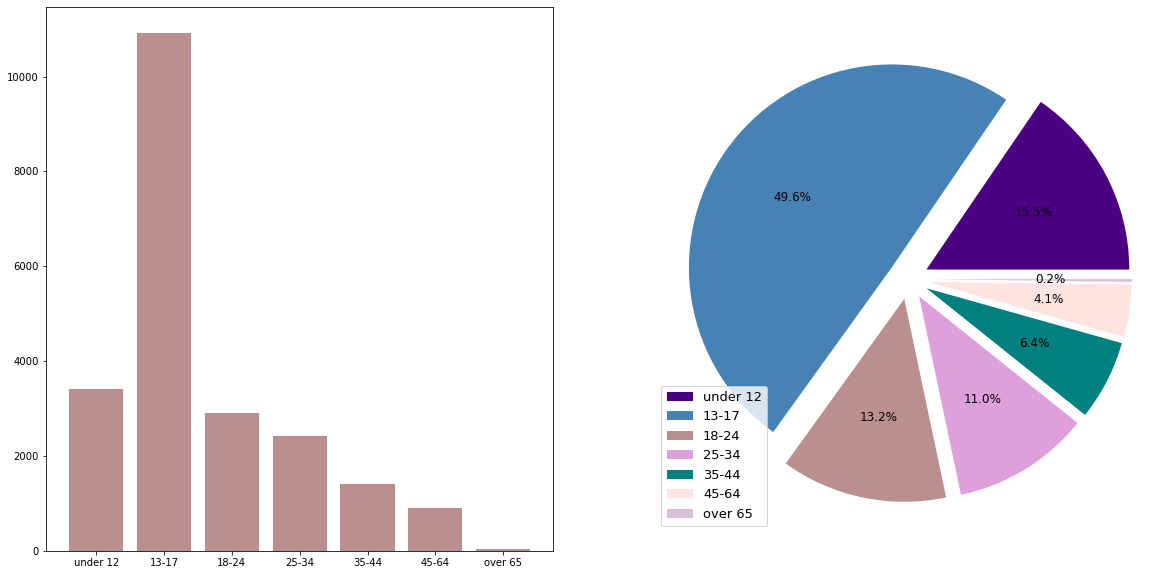

In [190]:
age = np.array(pivot_age['age'])
values = np.array(pivot_age['appsflyer_id'])


fig, ax = plt.subplots(1, 2)
plt.grid()

ax[0].bar(age, values, color = 'RosyBrown')

colors = ['Indigo', 'SteelBlue', 'RosyBrown', 'Plum', 'Teal', 'MistyRose', 'Thistle']
explode = [0.1 for _ in range(7)]
ax[1].pie(values, autopct='%1.1f%%', colors = colors, explode = explode, textprops={'size': 'large'})
ax[1].legend(age, fontsize = 13, loc = 'lower left')


fig.set_figwidth(20)  
fig.set_figheight(10) 

plt.show()

#### Конверсия в триальную и платную пидписки

In [161]:
pivot_trial = pd.pivot_table(data_merged_age_cc, index= 'age', values = ['trial_started', 'trial_converted'], 
                             aggfunc= 'sum').reset_index().reindex(columns=['age', 'trial_started', 'trial_converted'])


pivot_trial['percent_converted'] = np.round(pivot_trial['trial_converted'] / pivot_trial['trial_started'] * 100, 1)
pivot_trial

,age,trial_started,trial_converted,percent_converted
0,under 12,31,9,29.0
1,13-17,261,49,18.8
2,18-24,244,33,13.5
3,25-34,264,38,14.4
4,35-44,151,22,14.6
5,45-64,68,12,17.6
6,over 65,1,0,0.0


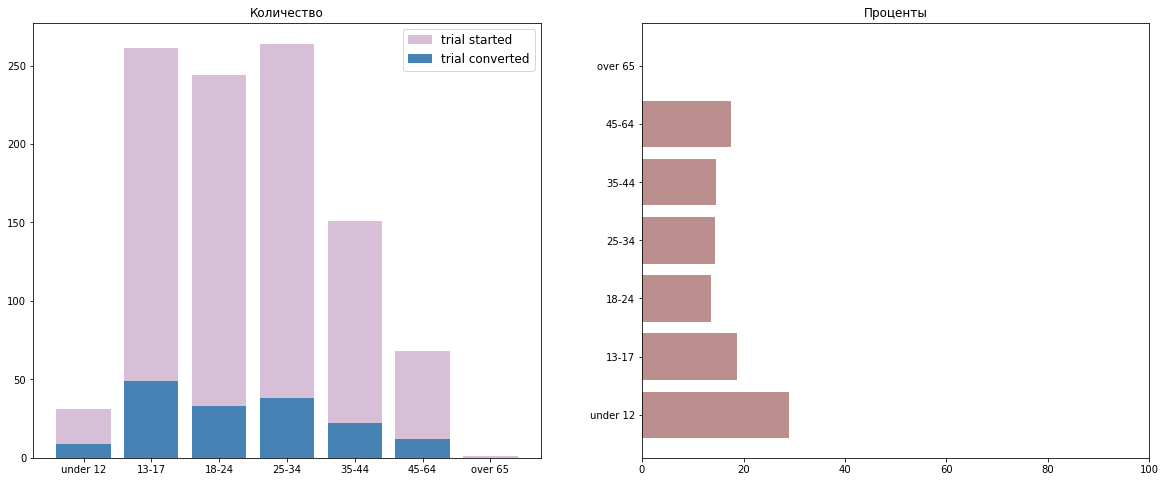

In [191]:
age = np.array(pivot_trial['age'])
trial_st = np.array(pivot_trial['trial_started'])
trial_cv = np.array(pivot_trial['trial_converted'])
percent = np.array(pivot_trial['percent_converted'])

fig, ax = plt.subplots(1, 2)
ax[0].bar(age, trial_st, color = 'Thistle', label = 'trial started')
ax[0].bar(age, trial_cv, color = 'SteelBlue', label = 'trial converted')


ax[1].barh(age, percent, color = 'RosyBrown')
ax[1].set(xlim=(0, 100))

ax[0].legend(fontsize = 12)
ax[0].set_title('Количество')
ax[1].set_title('Проценты')

fig.set_figwidth(20)  
fig.set_figheight(8) 